In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


# Лабораторная работа №5. Обработка естественного языка
Пан Анатолий Эдуардович<br>
Группа 932209<br>

In [2]:
os.chdir('/kaggle/input/covid-19-nlp-text-classification/')

Импортируем данные

In [3]:
import pandas as pd

df_train = pd.read_csv("Corona_NLP_train.csv", encoding='ISO-8859-1',index_col=False)
# df_test = pd.read_csv("Corona_NLP_test.csv", encoding='ISO-8859-1', index_col=False )

In [4]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## EDA

Распределение целевой переменной

<Axes: ylabel='count'>

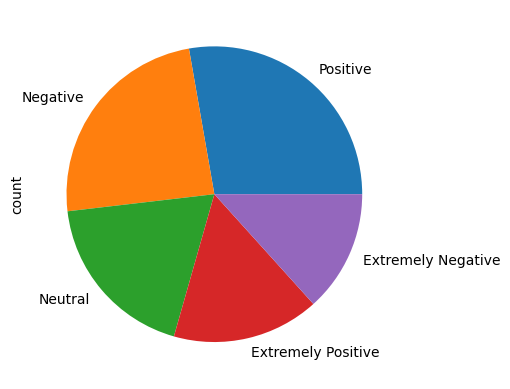

In [5]:
df_train["Sentiment"].value_counts().plot(kind='pie')

Объединим некоторые классы вместе

In [6]:
replace_dict = {
    'Extremely Positive': 'Positive',
    'Extremely Negative': 'Negative'
}

df_train['Sentiment'] = df_train['Sentiment'].replace(replace_dict)
df_train['Sentiment'].value_counts()

Sentiment
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64

<Axes: ylabel='count'>

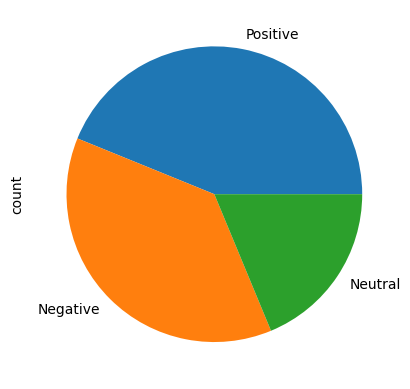

In [7]:
df_train["Sentiment"].value_counts().plot(kind='pie')

In [8]:
df_train = df_train.drop(columns=["UserName", "ScreenName", "Location", "TweetAt"], axis=1)

## Data Preprocessing

Выполним очистку текста: удалим ссылки, упоминания, хэштеги и т.д.

In [9]:
import re

In [10]:
def clean_tweet(tweet):
    # Следуюзие строки удаляют:
    # Ссылки (url)
    tweet = re.sub(r'http\S+', '', tweet)

    # Упоминания (@username)
    tweet = re.sub(r'@\w+', '', tweet)

    # Хэштеги (#)
    tweet = re.sub(r'#', '', tweet)

    # Хэштеги (#)
    tweet = re.sub(r'-', '', tweet)

    # Специальные символы и пунктуацию
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # non-ASCII символы
    tweet = tweet.encode('ascii', 'ignore').decode()

    # Приведение текста к нижнему регистру
    tweet = tweet.lower()

    # Удаление излишних пробелов
    tweet = ' '.join(tweet.split())

    return tweet

In [11]:
df_train["text"] = df_train["OriginalTweet"].apply(clean_tweet)
df_train = df_train.drop(["OriginalTweet"], axis=1)
df_train.head()

,Sentiment,text
0,Neutral,and and
1,Positive,advice talk to your neighbours family to excha...
2,Positive,coronavirus australia woolworths to give elder...
3,Positive,my food stock is not the only one which is emp...
4,Negative,me ready to go at supermarket during the covid...


Оставим лишь те твиты, в которых количество слов больше пяти

In [12]:
def count_words(text):
    return len(text.split())

df_train['num_of_words'] = df_train['text'].apply(count_words)

In [13]:
df_train.head()

,Sentiment,text,num_of_words
0,Neutral,and and,2
1,Positive,advice talk to your neighbours family to excha...,38
2,Positive,coronavirus australia woolworths to give elder...,13
3,Positive,my food stock is not the only one which is emp...,41
4,Negative,me ready to go at supermarket during the covid...,39


In [14]:
df_train = df_train[df_train["num_of_words"] > 5]
df_train.head()

,Sentiment,text,num_of_words
1,Positive,advice talk to your neighbours family to excha...,38
2,Positive,coronavirus australia woolworths to give elder...,13
3,Positive,my food stock is not the only one which is emp...,41
4,Negative,me ready to go at supermarket during the covid...,39
5,Positive,as news of the regions first confirmed covid19...,34


In [15]:
df_train = df_train.sample(frac=1).reset_index(drop=True)

Посмотрим на распредление целевой переменной

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(

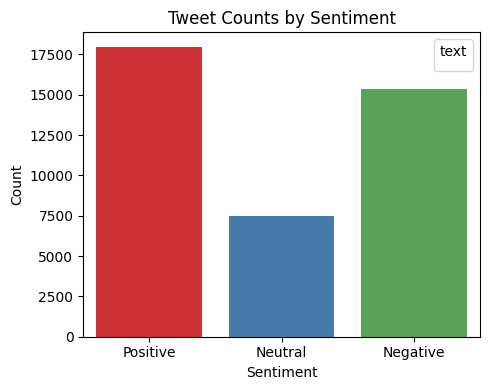

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.countplot(data=df_train, x='Sentiment', palette='Set1')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweet Counts by Sentiment')

plt.legend(title='text')
plt.tight_layout()
plt.show()

Закодируем признаки

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train["label"] = encoder.fit_transform(df_train["Sentiment"])

df_train.head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Sentiment,text,num_of_words,label
0,Positive,throughout the last few weeks my wife has work...,44,2
1,Neutral,the latest covid19 oar opens mini mart selling...,15,1
2,Positive,india s opposition urges gov t to stop profite...,17,2
3,Positive,ok family mayor lightfoot is first up for pres...,45,2
4,Negative,everyone out here panic buying food and toilet...,45,0


Т.к. данных достаточно для нашей задачи, то проведем undersampling для баланса классов

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


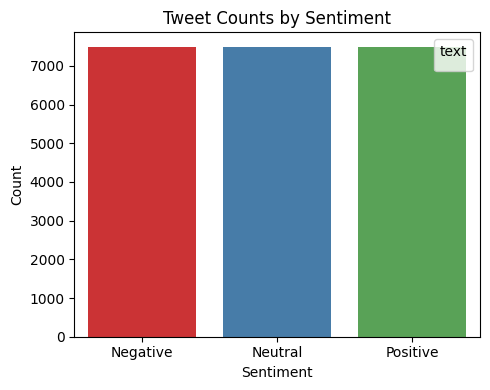

In [18]:
min_value = df_train['label'].value_counts().idxmin()

undersample_value = df_train['label'].value_counts().idxmin()

undersampled_df = df_train.groupby('label').apply(lambda x: x.sample(df_train['label'].value_counts().min())).reset_index(drop=True)
df = undersampled_df

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Sentiment', palette='Set1')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweet Counts by Sentiment')

plt.legend(title='text')
plt.tight_layout()
plt.show()

## Tokenization

Выполним токенизацию текста с моделью Bert Base Uncased

In [19]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import transformers
from tqdm import tqdm

In [20]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

In [21]:
sentences = df["text"]

In [22]:
input_ids=[]
attention_masks=[]

for sent in tqdm(sentences):
    bert_inp = tokenizer.encode_plus(sent,
                                     add_special_tokens=True,
                                     max_length=128,
                                     pad_to_max_length=True,
                                     truncation=True,
                                     return_attention_mask=True)
    input_ids.append(bert_inp['input_ids'])
    attention_masks.append(bert_inp['attention_mask'])

input_ids=np.asarray(input_ids)
attention_masks=np.array(attention_masks)
target = np.array(pd.get_dummies(df['label']))

  0%|          | 0/22476 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
100%|██████████| 22476/22476 [00:28<00:00, 778.53it/s]


Импортируем предобученную модель Bert

In [24]:
bert_model = transformers.TFBertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Разделим выборку

In [25]:
X_train, X_test, y_train, y_test, train_mask, test_mask = train_test_split(input_ids, target, attention_masks, test_size=0.2)

## Model 1a & 1b

Создание модели 1а

In [26]:
def create_model(model):
    input_ids = tf.keras.Input(shape=(128,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(128,), dtype='int32')

    output = model(input_ids, attention_masks)
    encoder_output = output[0]      
    pooler_output = output[1]
    output = tf.keras.layers.Concatenate()([encoder_output[:,0,:], pooler_output])

    output = tf.keras.layers.Dense(64, activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(32, activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(3, activation='softmax')(output)
    model = tf.keras.models.Model(inputs=[input_ids, attention_masks],
                                  outputs=output)


    for layer in model.layers[:3]:
        layer.trainable = False
    return model

In [32]:
model = create_model(bert_model)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_3[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_4[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                           

In [33]:
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam

In [34]:
loss_function = CategoricalCrossentropy()
optimizer = Adam(learning_rate=2e-5)

In [35]:
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

Сначала обучим модель 1а, а после разморозим веса для дообучения (модель 1b)

In [36]:
history = model.fit([X_train, train_mask],
                    y_train,
                    batch_size=64,
                    epochs=5,
                    validation_data=([X_test, test_mask], y_test))

Epoch 1/5
281/281 [==============================] - 207s 685ms/step - loss: 1.1100 - accuracy: 0.3582 - val_loss: 1.0692 - val_accuracy: 0.4471
Epoch 2/5
281/281 [==============================] - 194s 692ms/step - loss: 1.0777 - accuracy: 0.4085 - val_loss: 1.0470 - val_accuracy: 0.4838
Epoch 3/5
281/281 [==============================] - 194s 691ms/step - loss: 1.0653 - accuracy: 0.4321 - val_loss: 1.0260 - val_accuracy: 0.4964
Epoch 4/5
281/281 [==============================] - 194s 691ms/step - loss: 1.0462 - accuracy: 0.4565 - val_loss: 1.0114 - val_accuracy: 0.5171
Epoch 5/5
281/281 [==============================] - 194s 692ms/step - loss: 1.0343 - accuracy: 0.4732 - val_loss: 0.9975 - val_accuracy: 0.5238


Визуализация функции потерь и точности

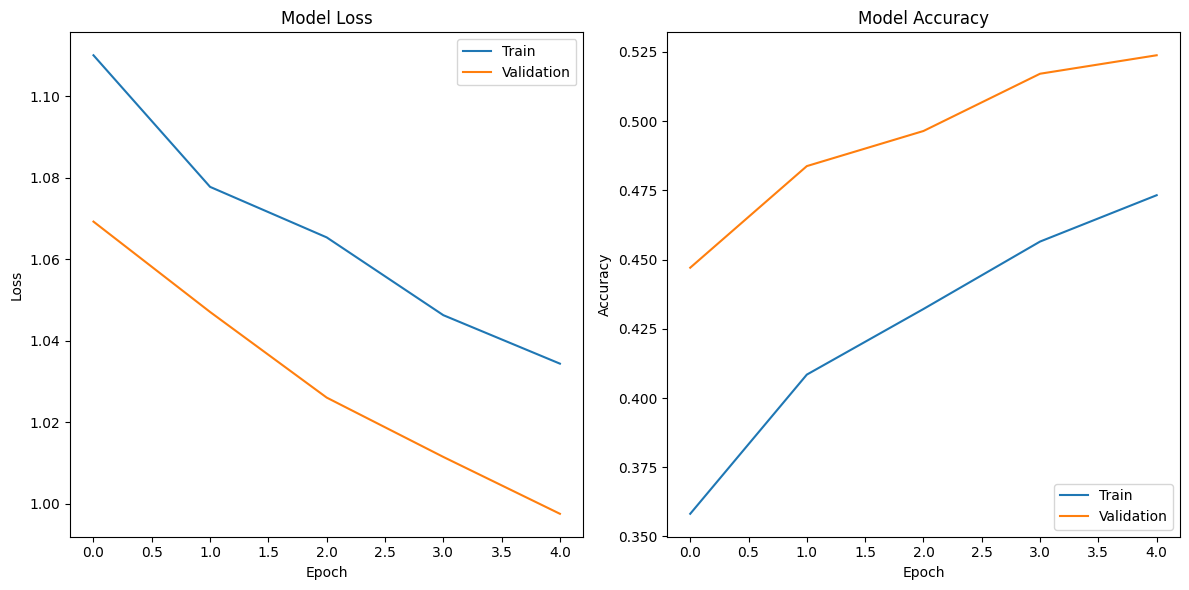

In [37]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

Выполним предсказание 

In [38]:
y_pred = model.predict([X_test, test_mask])

141/141 [==============================] - 41s 271ms/step


In [39]:
y_pred_classes = y_pred.argmax(axis=-1)
y_true_classes = y_test.argmax(axis=-1)

Остальные метрики

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55      1538
           1       0.54      0.51      0.52      1512
           2       0.50      0.49      0.50      1446

    accuracy                           0.52      4496
   macro avg       0.52      0.52      0.52      4496
weighted avg       0.52      0.52      0.52      4496



Попробуем провести fine-tuning (модель 1b)

In [42]:
for layer in model.layers[:3]:
    layer.trainable = True

In [54]:
from keras.optimizers.legacy import Adam

In [56]:
model.compile(loss=loss_function, optimizer=Adam(learning_rate=2e-5), metrics=['accuracy'])

In [57]:
history_fine_tuning = model.fit(
    [X_train, train_mask],
    y_train,
    batch_size=64,
    epochs=4,
    validation_data=([X_test, test_mask], y_test)
)

Epoch 1/4
281/281 [==============================] - 469s 2s/step - loss: 0.7550 - accuracy: 0.6844 - val_loss: 0.4940 - val_accuracy: 0.8187
Epoch 2/4
281/281 [==============================] - 457s 2s/step - loss: 0.4688 - accuracy: 0.8402 - val_loss: 0.4265 - val_accuracy: 0.8419
Epoch 3/4
281/281 [==============================] - 457s 2s/step - loss: 0.3385 - accuracy: 0.8904 - val_loss: 0.3786 - val_accuracy: 0.8723
Epoch 4/4
281/281 [==============================] - 457s 2s/step - loss: 0.2450 - accuracy: 0.9198 - val_loss: 0.3909 - val_accuracy: 0.8777


Посмотрим на результаты модели

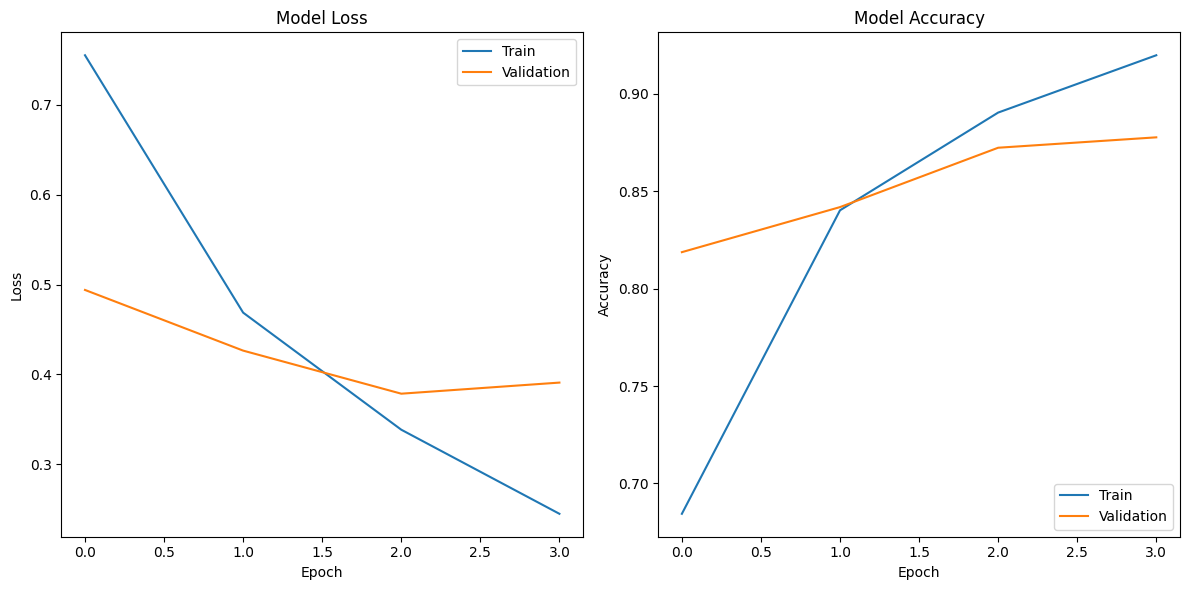

In [59]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_fine_tuning.history['loss'])
plt.plot(history_fine_tuning.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_fine_tuning.history['accuracy'])
plt.plot(history_fine_tuning.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [58]:
y_pred = model.predict([X_test, test_mask])

141/141 [==============================] - 41s 271ms/step


In [60]:
y_pred_classes = y_pred.argmax(axis=-1)
y_true_classes = y_test.argmax(axis=-1)

In [61]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1538
           1       0.93      0.84      0.88      1512
           2       0.89      0.86      0.87      1446

    accuracy                           0.88      4496
   macro avg       0.88      0.88      0.88      4496
weighted avg       0.88      0.88      0.88      4496



## LSTM

Теперь попробуем 2 последовательных слоя LSTM c Dropout

In [62]:
def create_model_lstm(model):
    input_ids = tf.keras.Input(shape=(128,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(128,), dtype='int32')

    output = model(input_ids, attention_masks)
    encoder_output = output[0]
    pooler_output = output[1]
    output_concat = tf.keras.layers.Concatenate()([encoder_output[:, 0, :], pooler_output])

    # Добавление LSTM-ячеек
    lstm1 = tf.keras.layers.LSTM(64, return_sequences=True)(tf.expand_dims(output_concat, axis=1))
    lstm2 = tf.keras.layers.LSTM(32)(lstm1)
    output = tf.keras.layers.Dropout(0.2)(lstm2)
    output = tf.keras.layers.Dense(3, activation='softmax')(output)

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

#     for layer in model.layers[:3]:
#         layer.trainable = False

    return model


In [63]:
from keras.optimizers import Adam

In [77]:
model_lstm_1 = create_model_lstm(bert_model)
model_lstm_1.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_9[0][0]',             
 )                           ngAndCrossAttentions(last_   40         'input_10[0][0]']            
                             hidden_state=(None, 128, 7                                           
                             68),                                                           

In [78]:
optimizer = Adam(learning_rate=2e-5)

In [79]:
model_lstm_1.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [80]:
history_lstm_1 = model_lstm_1.fit([X_train, train_mask],
                    y_train,
                    batch_size=64,
                    epochs=4,
                    validation_data=([X_test, test_mask], y_test))

Epoch 1/4
281/281 [==============================] - 211s 687ms/step - loss: 0.7824 - accuracy: 0.9020 - val_loss: 0.5950 - val_accuracy: 0.8779
Epoch 2/4
281/281 [==============================] - 194s 692ms/step - loss: 0.4367 - accuracy: 0.9412 - val_loss: 0.4648 - val_accuracy: 0.8794
Epoch 3/4
281/281 [==============================] - 194s 693ms/step - loss: 0.3256 - accuracy: 0.9448 - val_loss: 0.4201 - val_accuracy: 0.8781
Epoch 4/4
281/281 [==============================] - 195s 693ms/step - loss: 0.2751 - accuracy: 0.9442 - val_loss: 0.4009 - val_accuracy: 0.8759


Выполним анализ полученных результатов

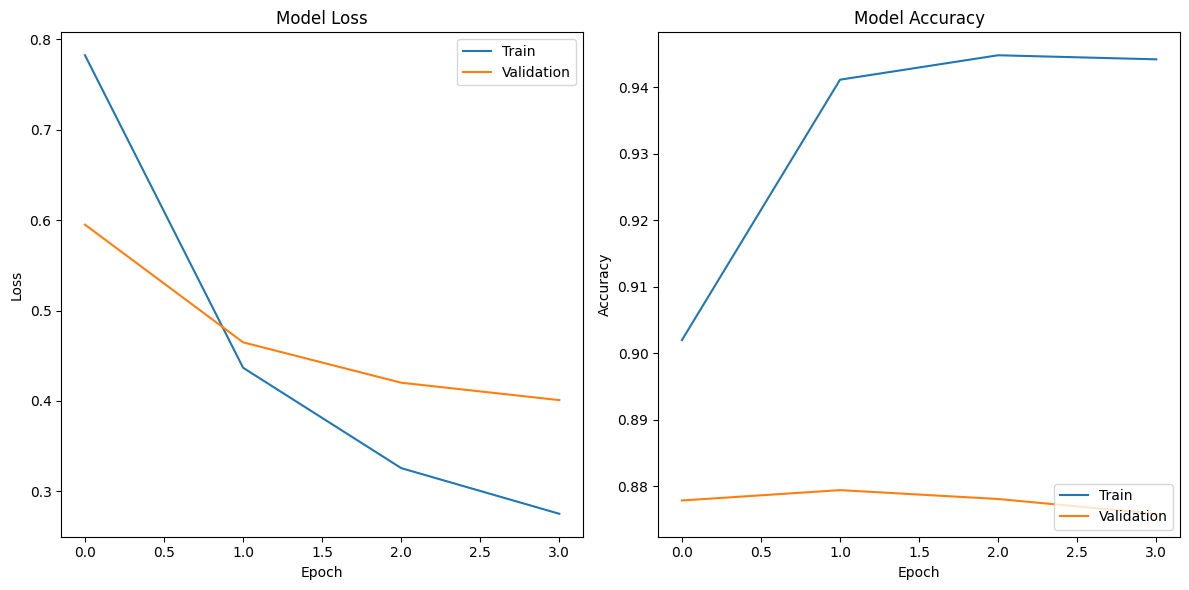

In [81]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm_1.history['loss'])
plt.plot(history_lstm_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_lstm_1.history['accuracy'])
plt.plot(history_lstm_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [85]:
y_pred = model_lstm_1.predict([X_test, test_mask])

141/141 [==============================] - 41s 264ms/step


In [88]:
y_pred_classes = y_pred.argmax(axis=-1)
y_true_classes = y_test.argmax(axis=-1)

In [89]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1538
           1       0.90      0.85      0.88      1512
           2       0.87      0.87      0.87      1446

    accuracy                           0.88      4496
   macro avg       0.88      0.88      0.88      4496
weighted avg       0.88      0.88      0.88      4496



## Bidirectional LSTM

А теперь обучим модель с двунаправленной ячейком LSTM

In [94]:
def create_model_bi_lstm(model):
    input_ids = tf.keras.Input(shape=(128,), dtype='int32')
    attention_masks = tf.keras.Input(shape=(128,), dtype='int32')

    output = model(input_ids, attention_masks)
    encoder_output = output[0]
    pooler_output = output[1]
    output_concat = tf.keras.layers.Concatenate()([encoder_output[:, 0, :], pooler_output])

    lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(tf.expand_dims(output_concat, axis=1))
    output = tf.keras.layers.Dropout(0.2)(lstm)
    output = tf.keras.layers.Dense(3, activation='softmax')(output[:, -1, :])

    model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

#     for layer in model.layers[:3]:
#         layer.trainable = False

    return model

# def create_model(model):
#     input_ids = tf.keras.Input(shape=(128,), dtype='int32')
#     attention_masks = tf.keras.Input(shape=(128,), dtype='int32')

#     output = model(input_ids, attention_masks)
#     encoder_output = output[0]
#     pooler_output = output[1]
#     output_concat = tf.keras.layers.Concatenate()([encoder_output[:, 0, :], pooler_output])

#     lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(tf.expand_dims(output_concat, axis=1))
#     output = tf.keras.layers.Dropout(0.2)(lstm)
#     output = tf.keras.layers.Dense(3, activation='softmax')(output)

#     model = tf.keras.models.Model(inputs=[input_ids, attention_masks], outputs=output)

#     # Заморозка первых трех слоев
#     for layer in model.layers[:3]:
#         layer.trainable = False

#     return model


In [99]:
model_lstm_2 = create_model_bi_lstm(bert_model)
model_lstm_2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 128)]                0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_15[0][0]',            
 )                           ngAndCrossAttentions(last_   40         'input_16[0][0]']            
                             hidden_state=(None, 128, 7                                           
                             68),                                                           

In [100]:
from keras.optimizers.legacy import Adam

In [101]:
model_lstm_2.compile(loss=loss_function, optimizer=Adam(learning_rate=2e-5), metrics=['accuracy'])

In [102]:
history_lstm_2 = model_lstm_2.fit([X_train, train_mask],
                    y_train,
                    batch_size=64,
                    epochs=4,
                    validation_data=([X_test, test_mask], y_test))

Epoch 1/4
281/281 [==============================] - 205s 678ms/step - loss: 0.3436 - accuracy: 0.9205 - val_loss: 0.3722 - val_accuracy: 0.8779
Epoch 2/4
281/281 [==============================] - 194s 691ms/step - loss: 0.1678 - accuracy: 0.9444 - val_loss: 0.3991 - val_accuracy: 0.8766
Epoch 3/4
281/281 [==============================] - 194s 692ms/step - loss: 0.1585 - accuracy: 0.9457 - val_loss: 0.4116 - val_accuracy: 0.8746
Epoch 4/4
281/281 [==============================] - 195s 693ms/step - loss: 0.1603 - accuracy: 0.9457 - val_loss: 0.4109 - val_accuracy: 0.8748


Оценим результаты

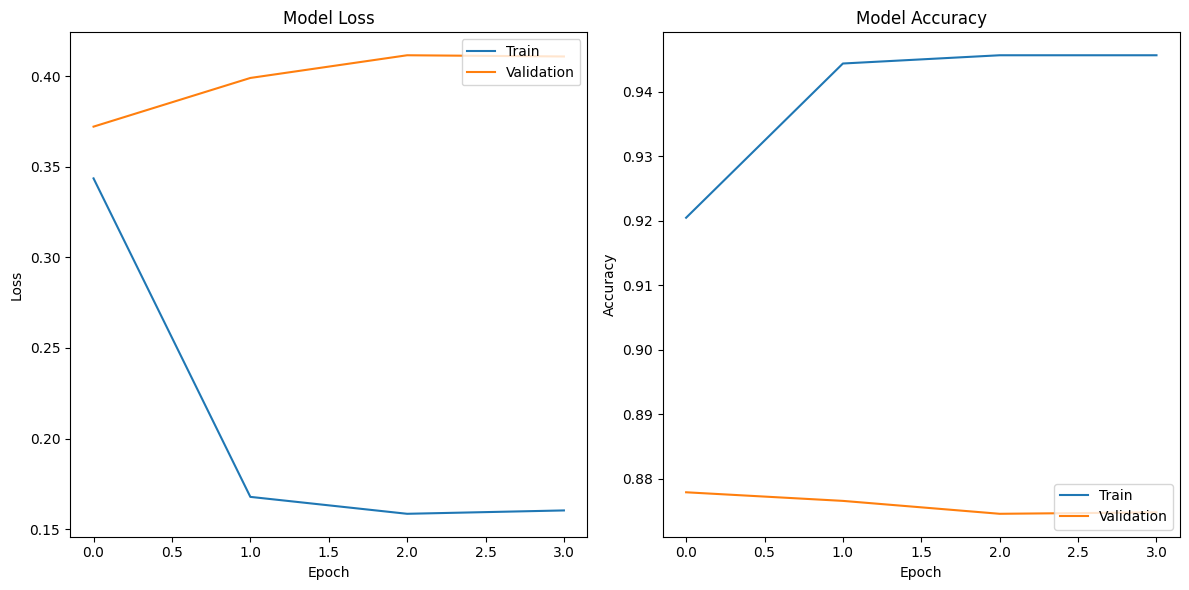

In [106]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm_2.history['loss'])
plt.plot(history_lstm_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_lstm_2.history['accuracy'])
plt.plot(history_lstm_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [103]:
y_pred = model_lstm_2.predict([X_test, test_mask])

141/141 [==============================] - 42s 271ms/step


In [104]:
y_pred_classes = y_pred.argmax(axis=-1)
y_true_classes = y_test.argmax(axis=-1)

In [107]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1538
           1       0.88      0.86      0.87      1512
           2       0.87      0.87      0.87      1446

    accuracy                           0.87      4496
   macro avg       0.87      0.87      0.87      4496
weighted avg       0.87      0.87      0.87      4496



## Вывод

Использование полносвязных слоев показывается себя очень хорошо, после проведения Fine-Tuning. Касательно моделей с LSTM и двунаправленной ячейкой LSTM, то тут на первой эпохе сразу очень хорошие результаты.

На качество обучения очень сильно влияет размер набора данных, т.к. при маленьком наборе, как было изначально, примерно 200 записей, модель недообучается. Это не позволяет полноценно применять ее для классификации текстов